### Analyzing blank images

Due to cameras being sometimes unavailable, it is necessary 

Unmatched filename: .DS_Store
Unmatched filename: .ipynb_checkpoints


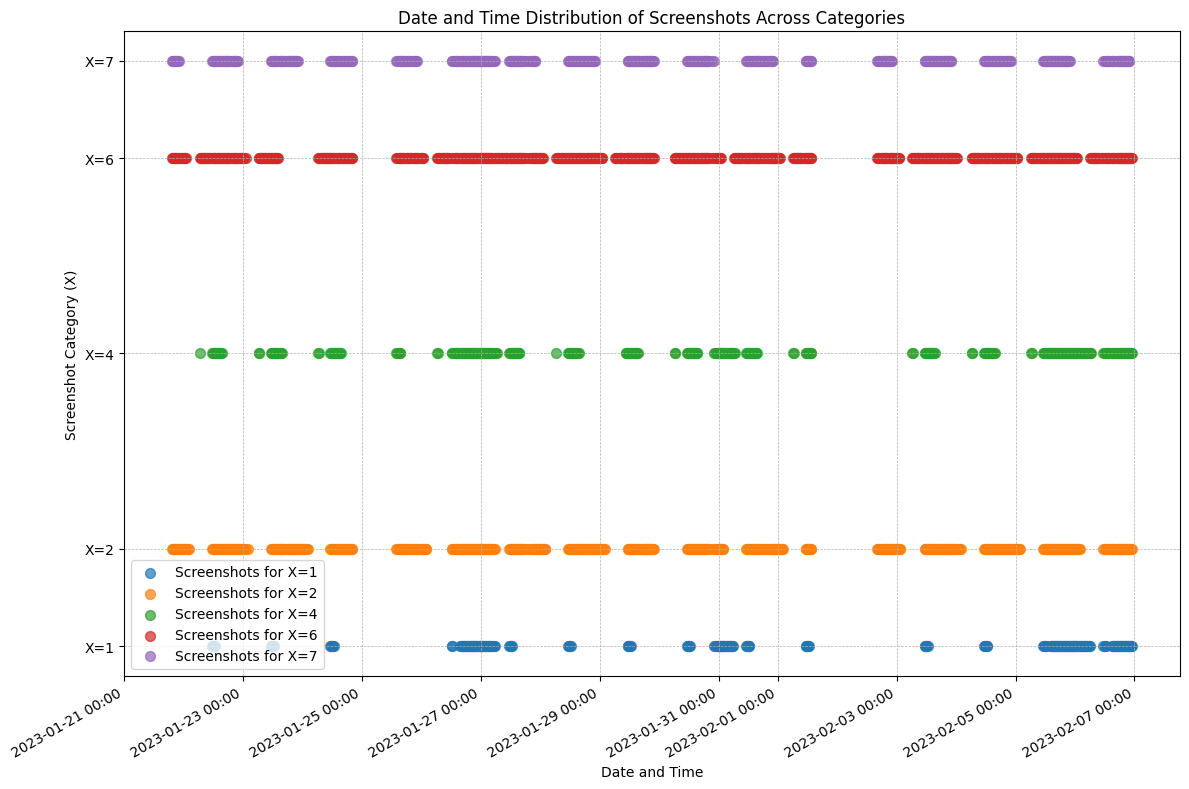

In [2]:
import os
import re
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_image_dates_and_times_combined(directory):
    pattern = re.compile(r'screenshot(\d+)_(\d{2})_(\d{2})__(\d{2})_(\d{2})\.png')
    data = {}  # {X: [datetime objects]}
    
    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            X, day, month, hour, minute = map(int, match.groups())
            timestamp = datetime(year=2023, month=month, day=day, hour=hour, minute=minute)
            if X not in data:
                data[X] = []
            data[X].append(timestamp)
        else:
            print(f"Unmatched filename: {filename}")

    # Sort data by X for consistent color assignment in plot
    data = dict(sorted(data.items()))

    plt.figure(figsize=(12, 8))
    
    for X, timestamps in data.items():
        # Sort timestamps
        timestamps.sort()
        # Plot each group of screenshots
        plt.scatter(timestamps, [X] * len(timestamps), alpha=0.7, label=f'Screenshots for X={X}', s=50)
    
    plt.yticks(sorted(data.keys()), [f'X={X}' for X in sorted(data.keys())])  # Label y-axis with 'X' values
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xlabel('Date and Time')
    plt.ylabel('Screenshot Category (X)')
    plt.title('Date and Time Distribution of Screenshots Across Categories')
    plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Replace "../../SLONI_notnew" with the actual directory path where your screenshot files are stored
plot_image_dates_and_times_combined("../../data/images/")


Unmatched filename: .DS_Store
Unmatched filename: .ipynb_checkpoints


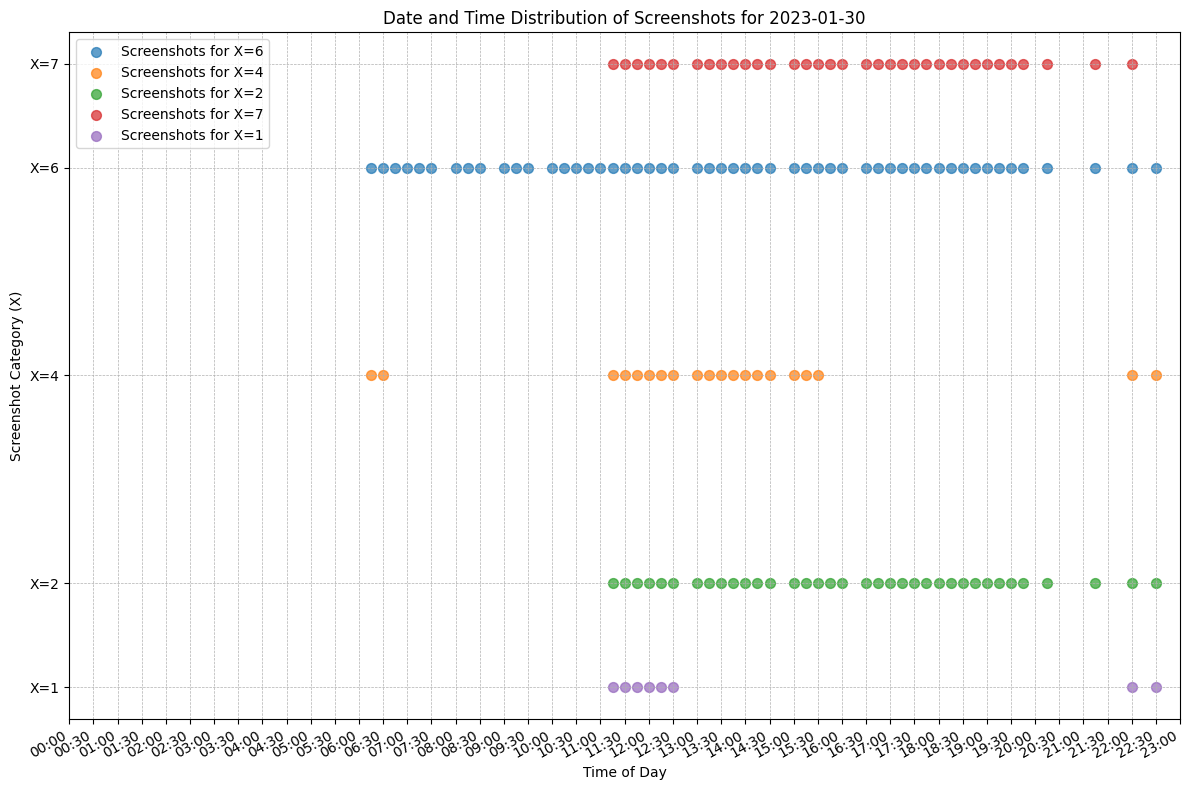

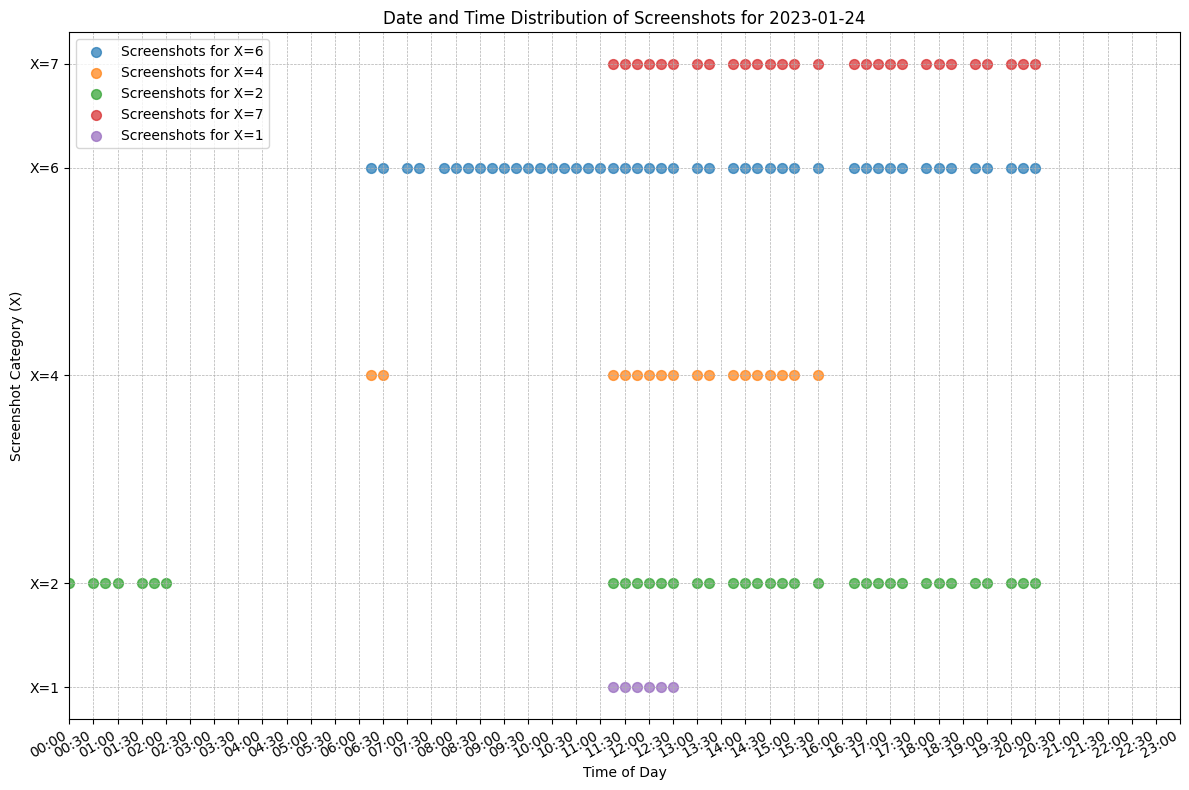

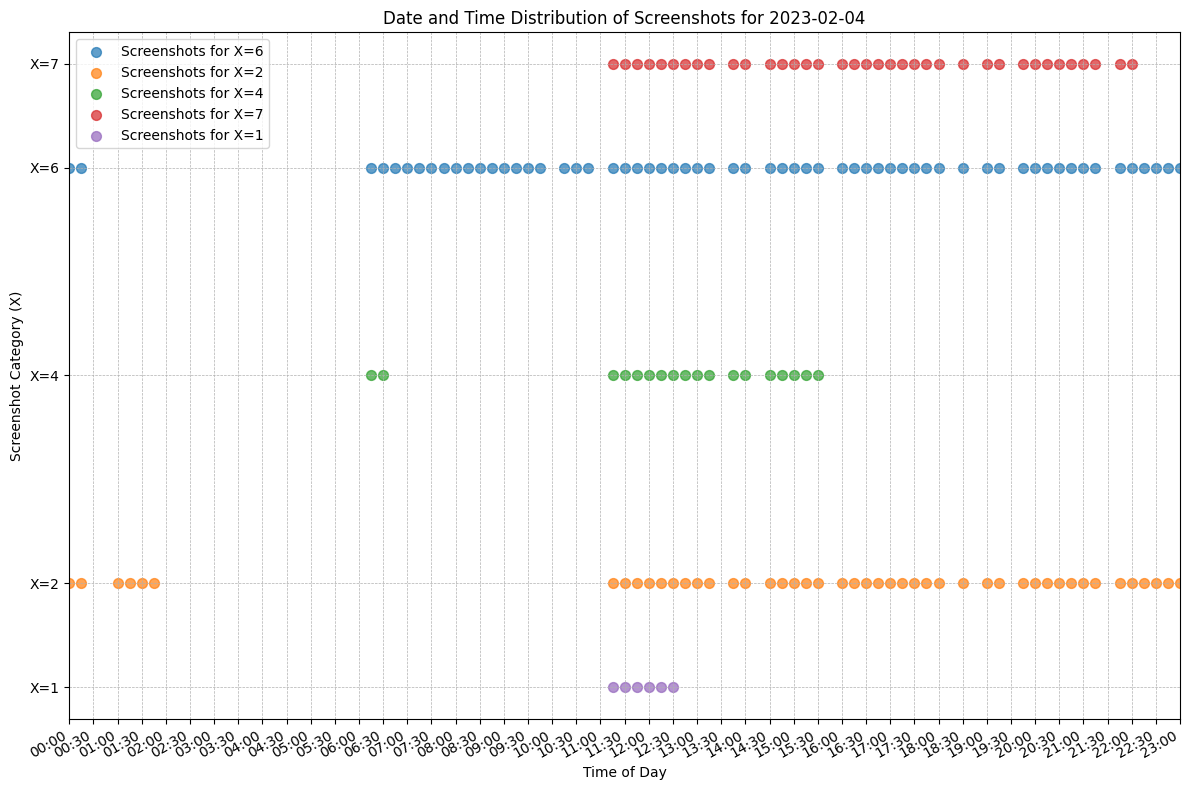

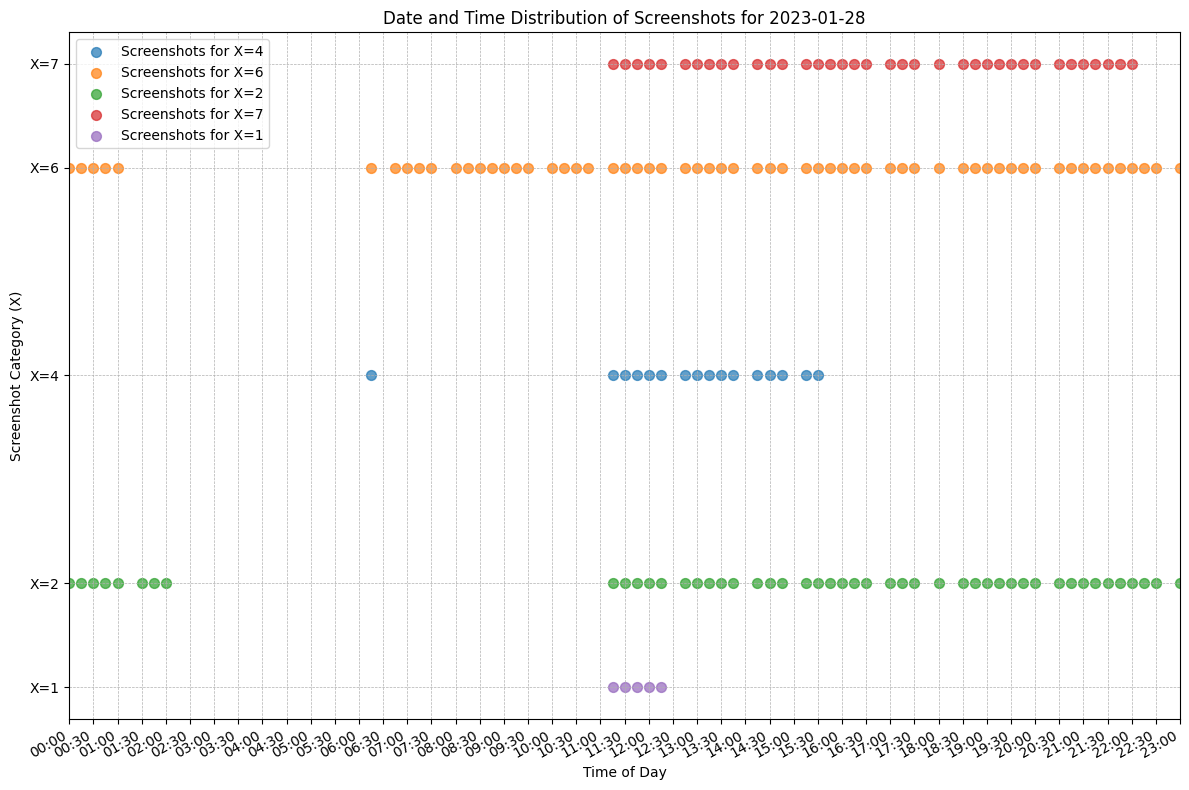

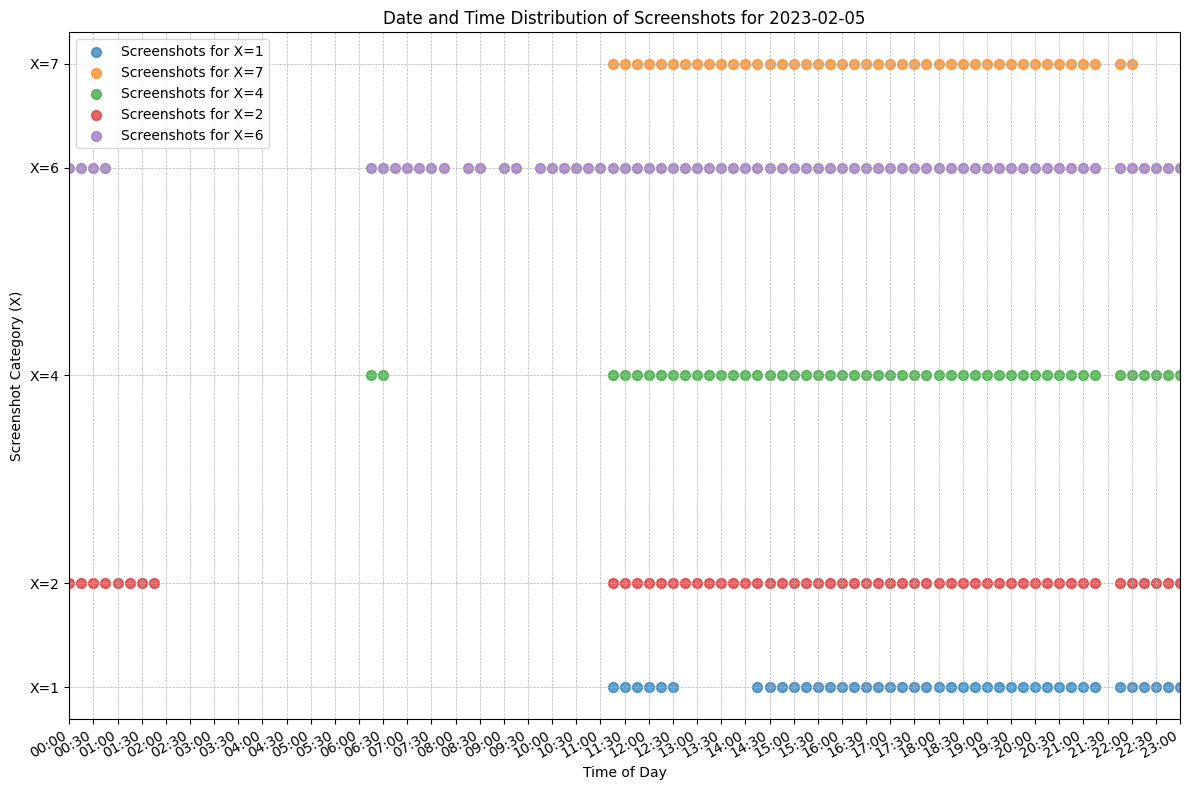

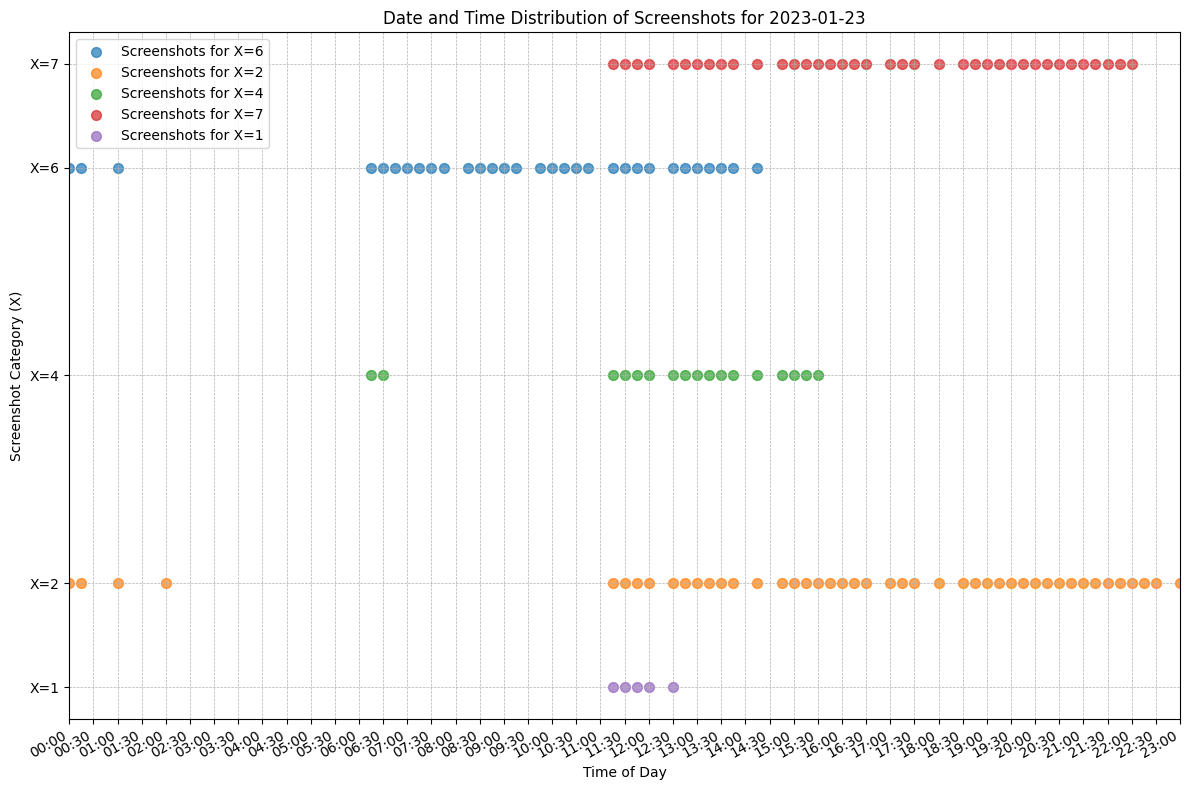

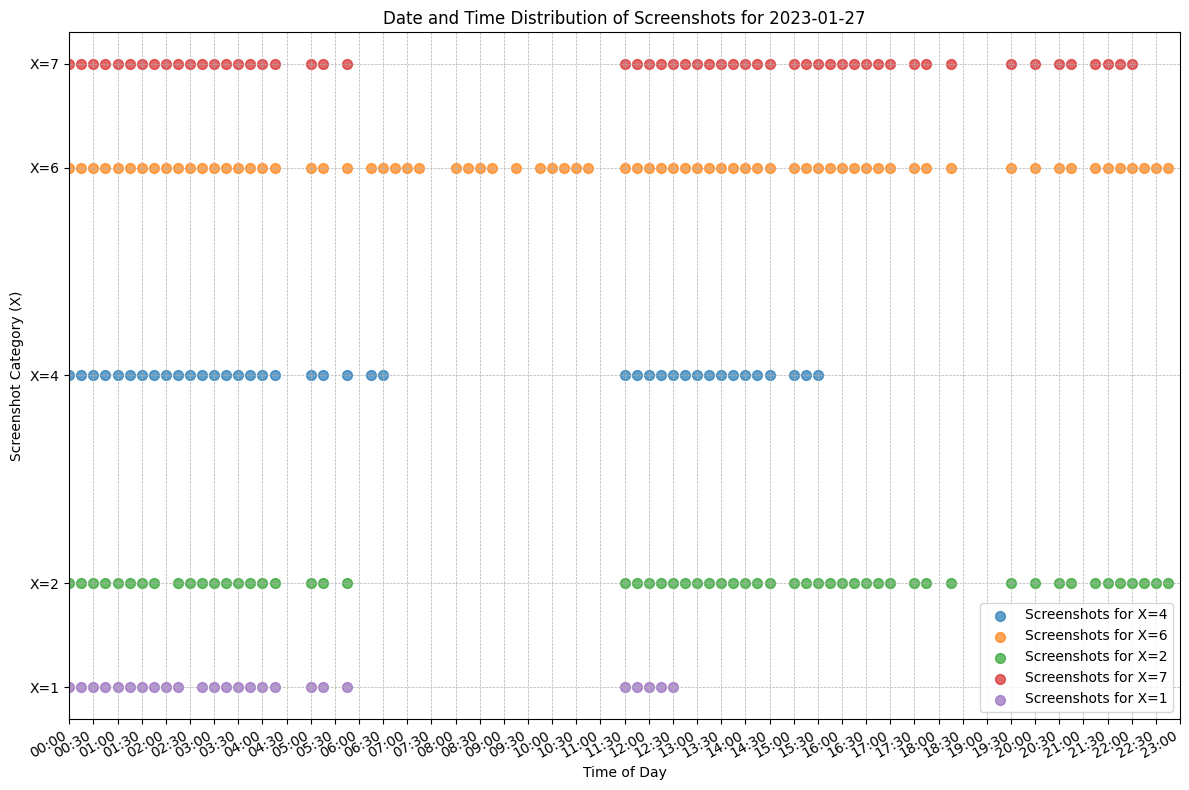

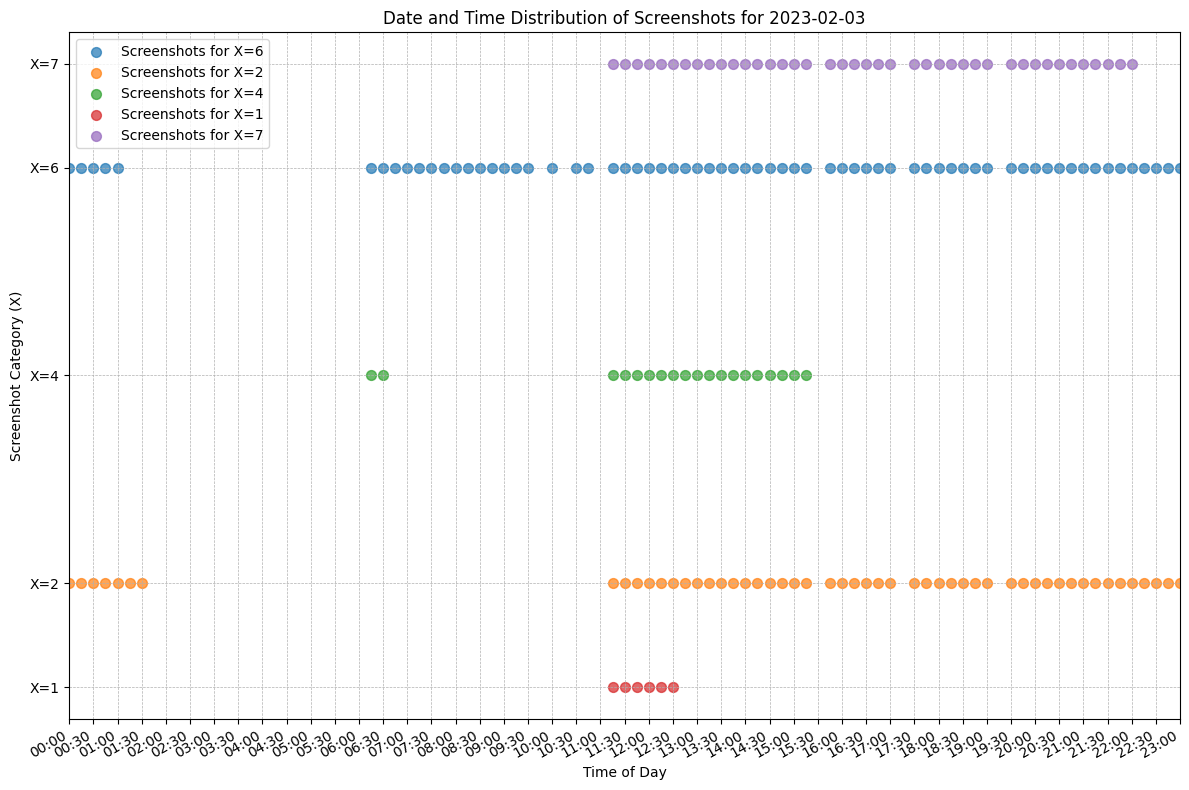

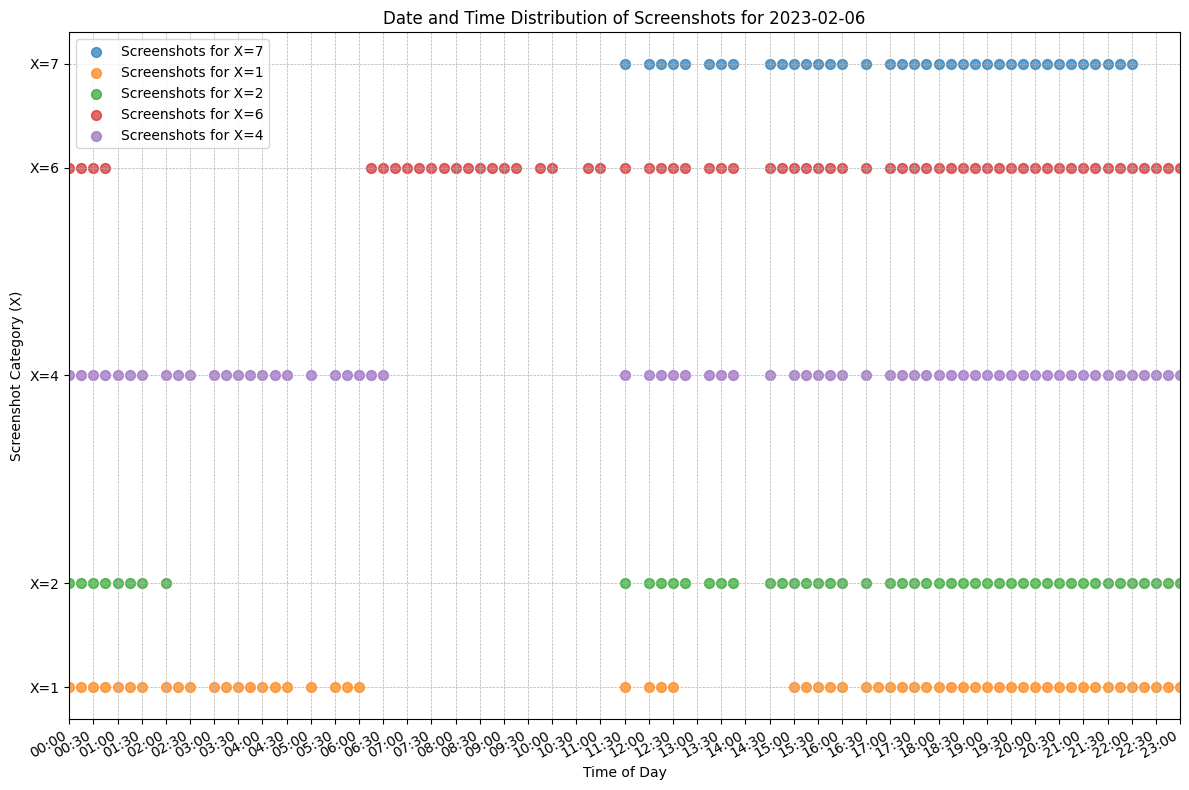

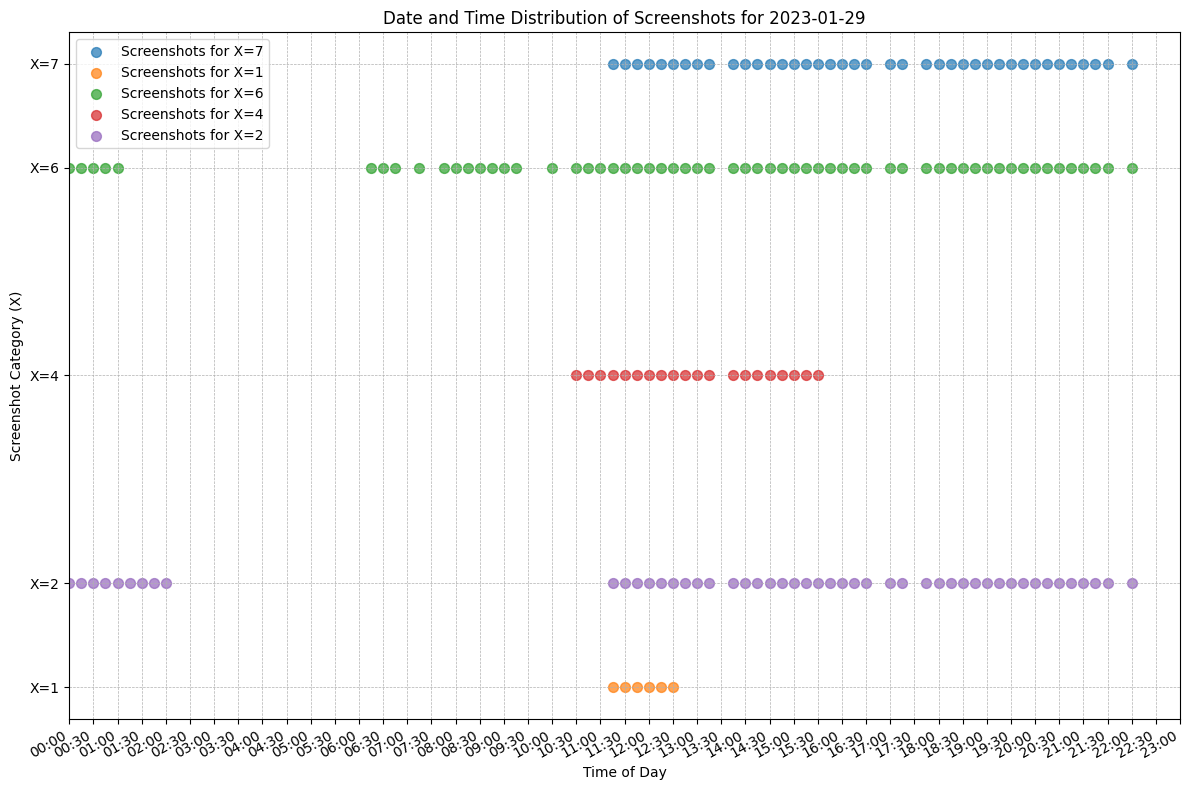

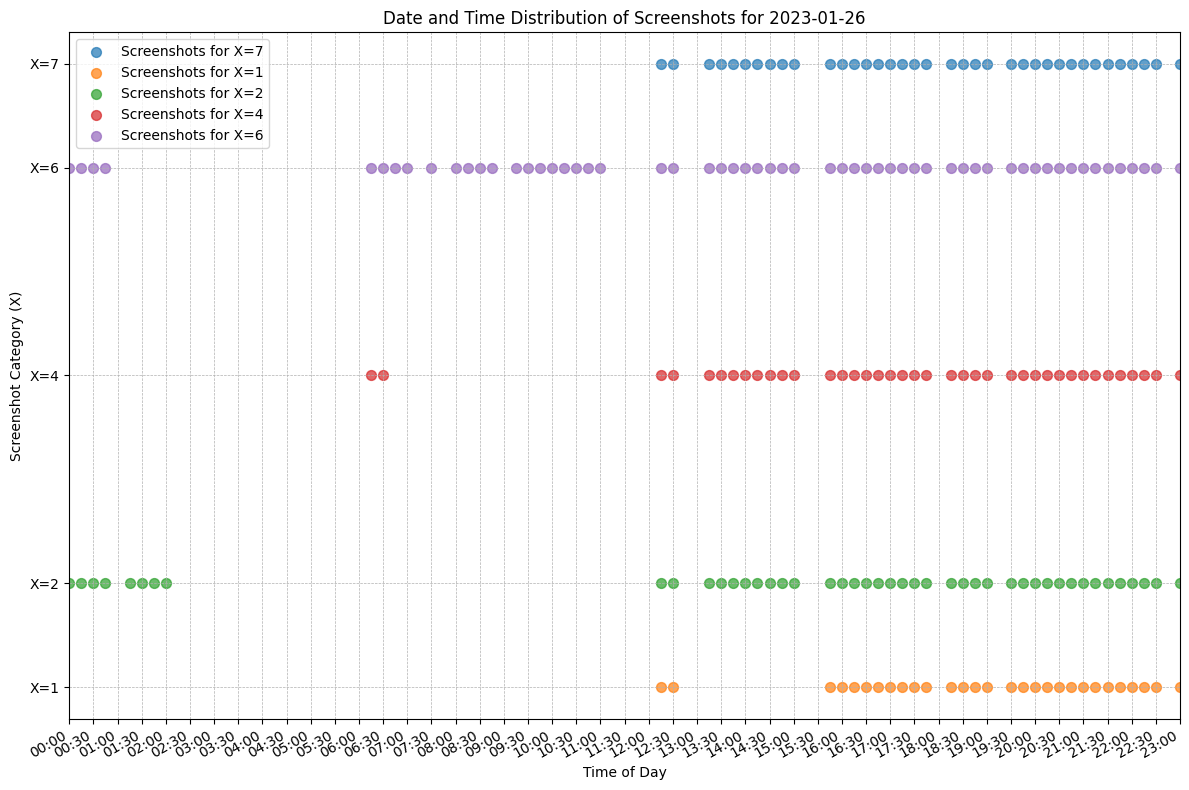

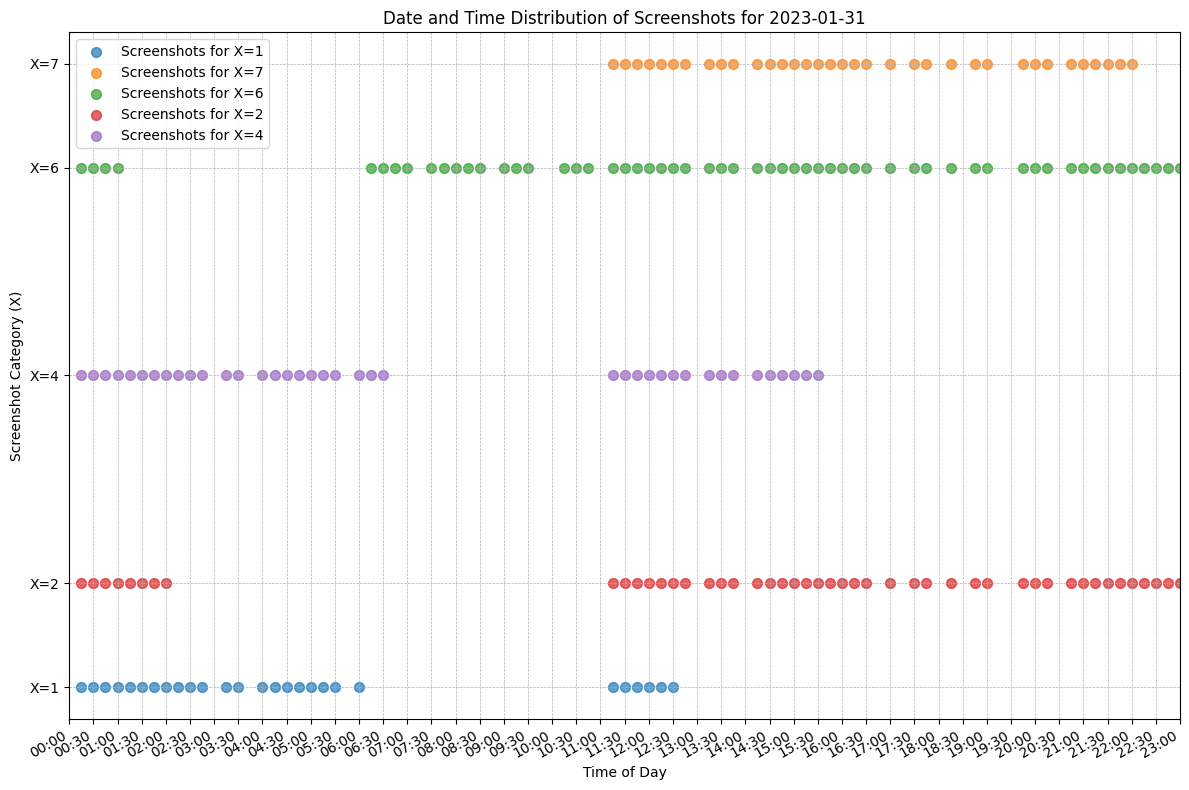

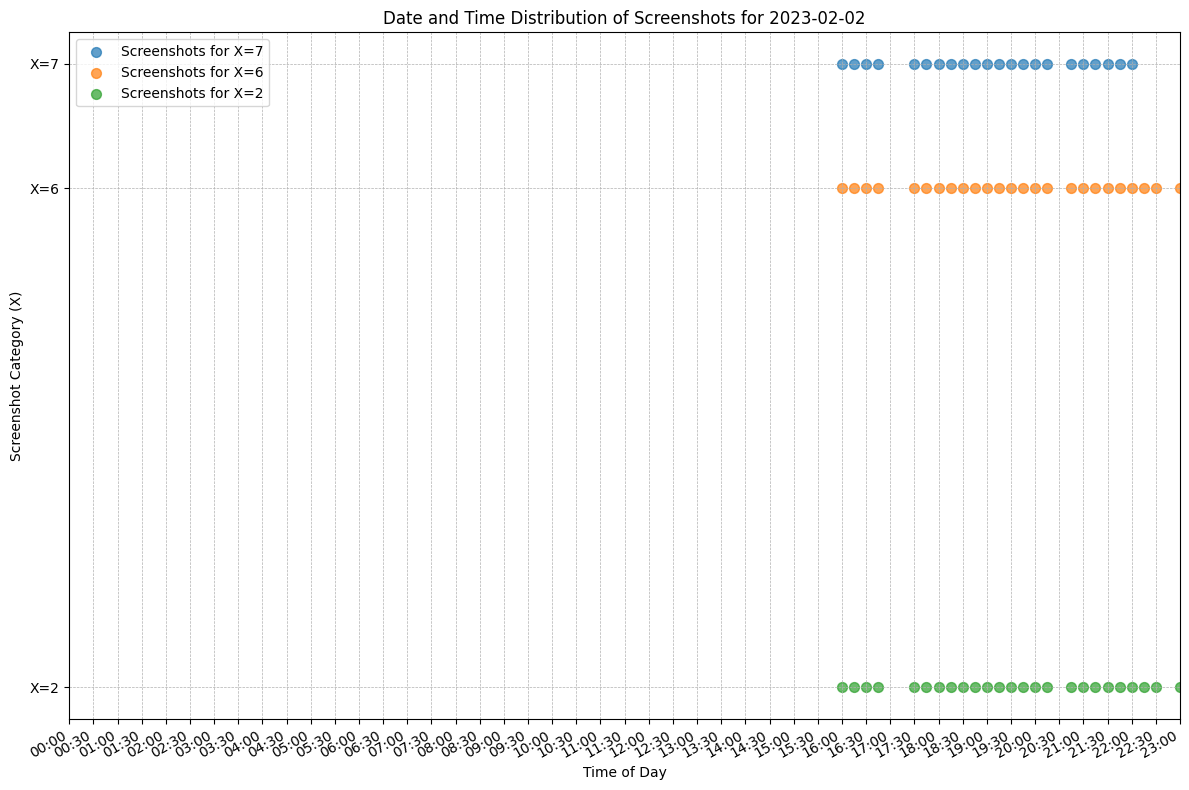

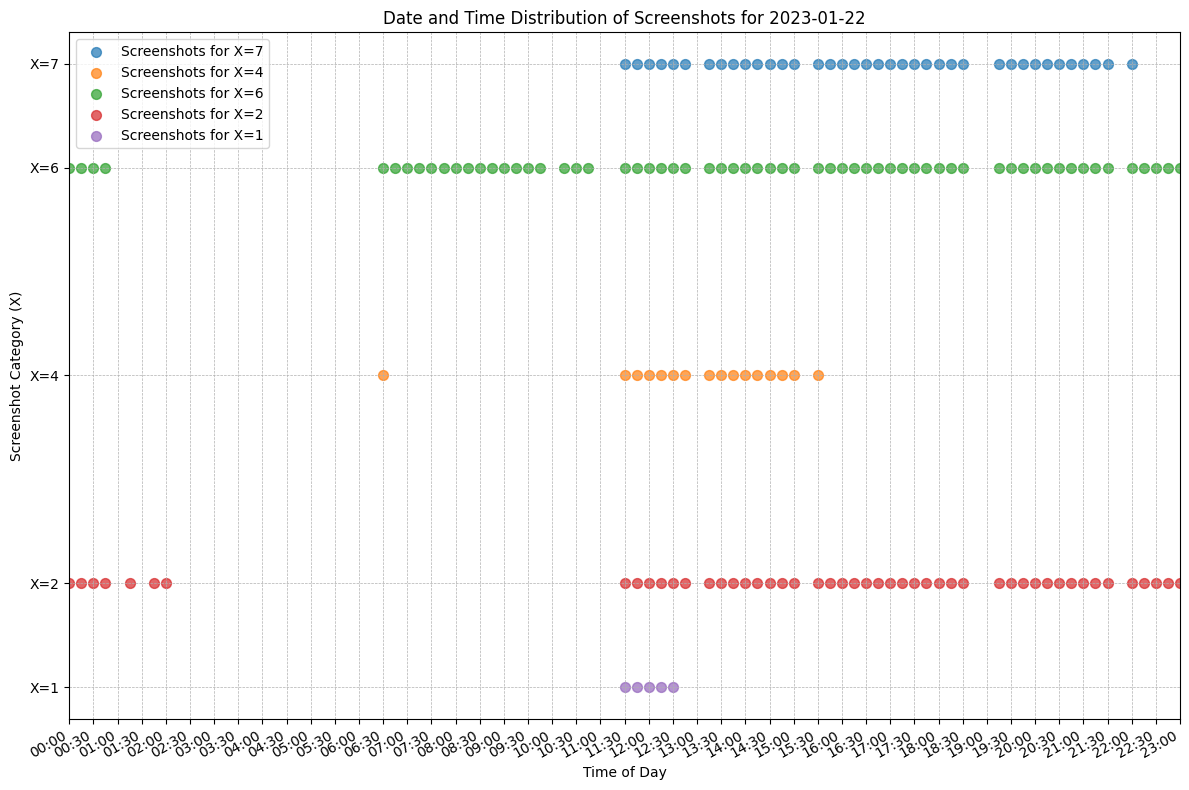

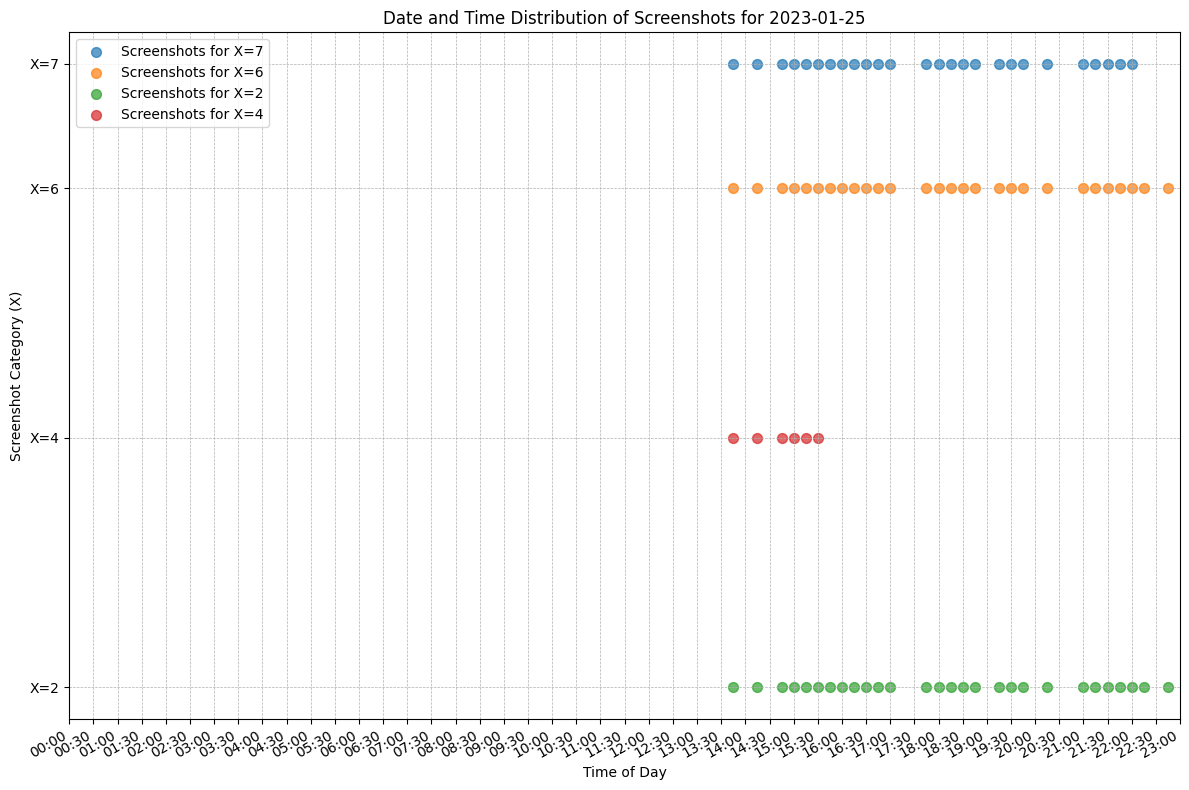

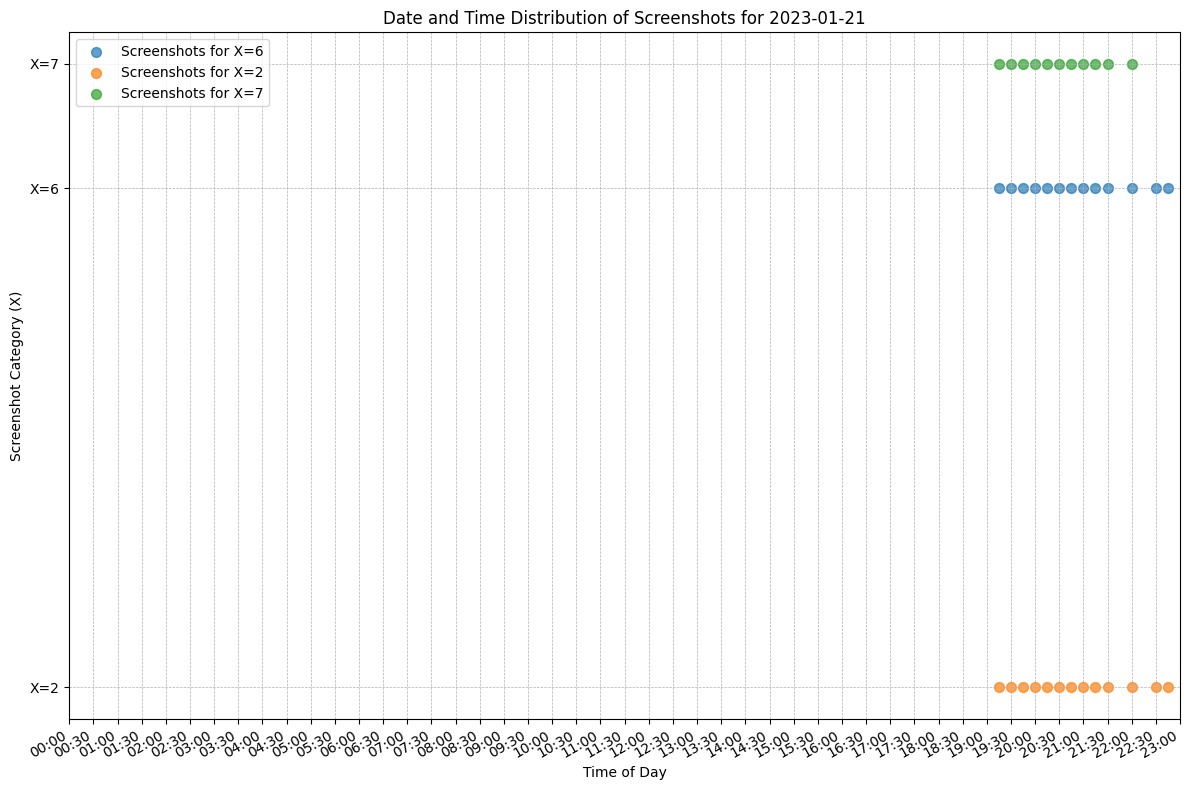

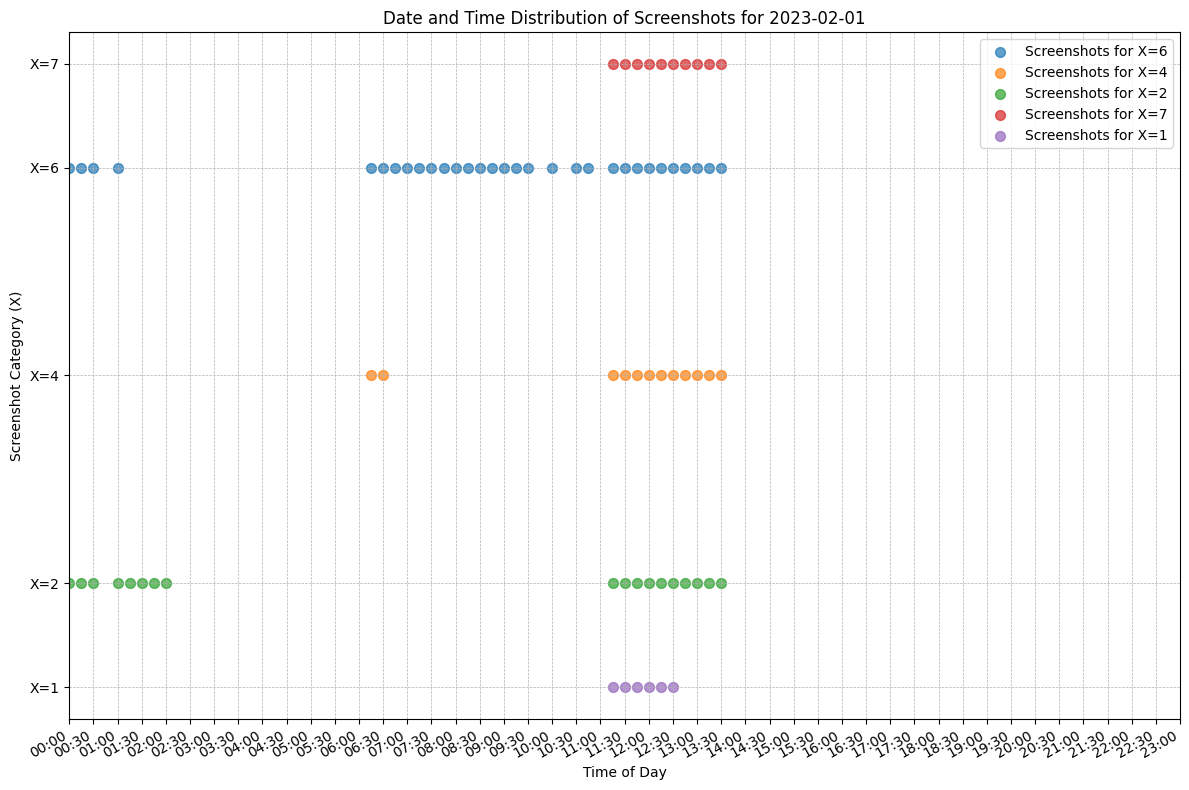

In [12]:
import os
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_image_dates_and_times_by_day(directory):
    pattern = re.compile(r'screenshot(\d+)_(\d{2})_(\d{2})__(\d{2})_(\d{2})\.png')
    data = {}  # {X: [datetime objects]}
    
    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            X, day, month, hour, minute = map(int, match.groups())
            timestamp = datetime(year=2023, month=month, day=day, hour=hour, minute=minute)
            date_key = timestamp.strftime('%Y-%m-%d')
            if date_key not in data:
                data[date_key] = {}
            if X not in data[date_key]:
                data[date_key][X] = []
            data[date_key][X].append(timestamp)
        else:
            print(f"Unmatched filename: {filename}")

    # Process each day separately
    for date_key, day_data in data.items():
        plt.figure(figsize=(12, 8))
        for X, timestamps in day_data.items():
            timestamps.sort()  # Sort timestamps
            
            plt.scatter(timestamps, [X] * len(timestamps), alpha=0.7, label=f'Screenshots for X={X}', s=50)
        
        plt.yticks(sorted(day_data.keys()), [f'X={X}' for X in sorted(day_data.keys())])

        # Setting the x-axis to start at 00:00 and end at 23:30
        # Convert date_key string to a datetime.date object
        date_obj = datetime.strptime(date_key, '%Y-%m-%d').date()
        
        # Now use date_obj with datetime.combine to set the x-axis limits
        start_time = datetime.strptime('00:00', '%H:%M').time()
        end_time = datetime.strptime('23:00', '%H:%M').time()
        plt.gca().set_xlim([datetime.combine(date_obj, start_time), datetime.combine(date_obj, end_time)])
        
        # Adjusting the Major Locator to tick every 30 minutes
        plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 30]))
        
        # Formatting the x-axis labels to show time in HH:MM and rotating them 90 degrees for clarity
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.gcf().autofmt_xdate(rotation=90)  # Rotate date labels 90 degrees
        plt.xlabel('Time of Day')
        plt.ylabel('Screenshot Category (X)')
        plt.title(f'Date and Time Distribution of Screenshots for {date_key}')
        plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Replace with the actual directory path where your screenshot files are stored
plot_image_dates_and_times_by_day("../../data/images/")
